<a href="https://colab.research.google.com/github/pbcong/catvsdog/blob/main/model_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#import libraries
import tensorflow as tf
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, Dense, Conv2D, MaxPooling2D, Flatten
import cv2
import imghdr

In [ ]:
#check no of GPUs used for training
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
#using keras.utils to load image data (change the directory to where data is stored)
data = tf.keras.utils.image_dataset_from_directory('/content/data')             #this automatically resize the images to 256*256 and divide them into batches of 32 images
len(data)

NotFoundError: ignored

In [ ]:
#create an iterator to go through the data
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

NameError: ignored

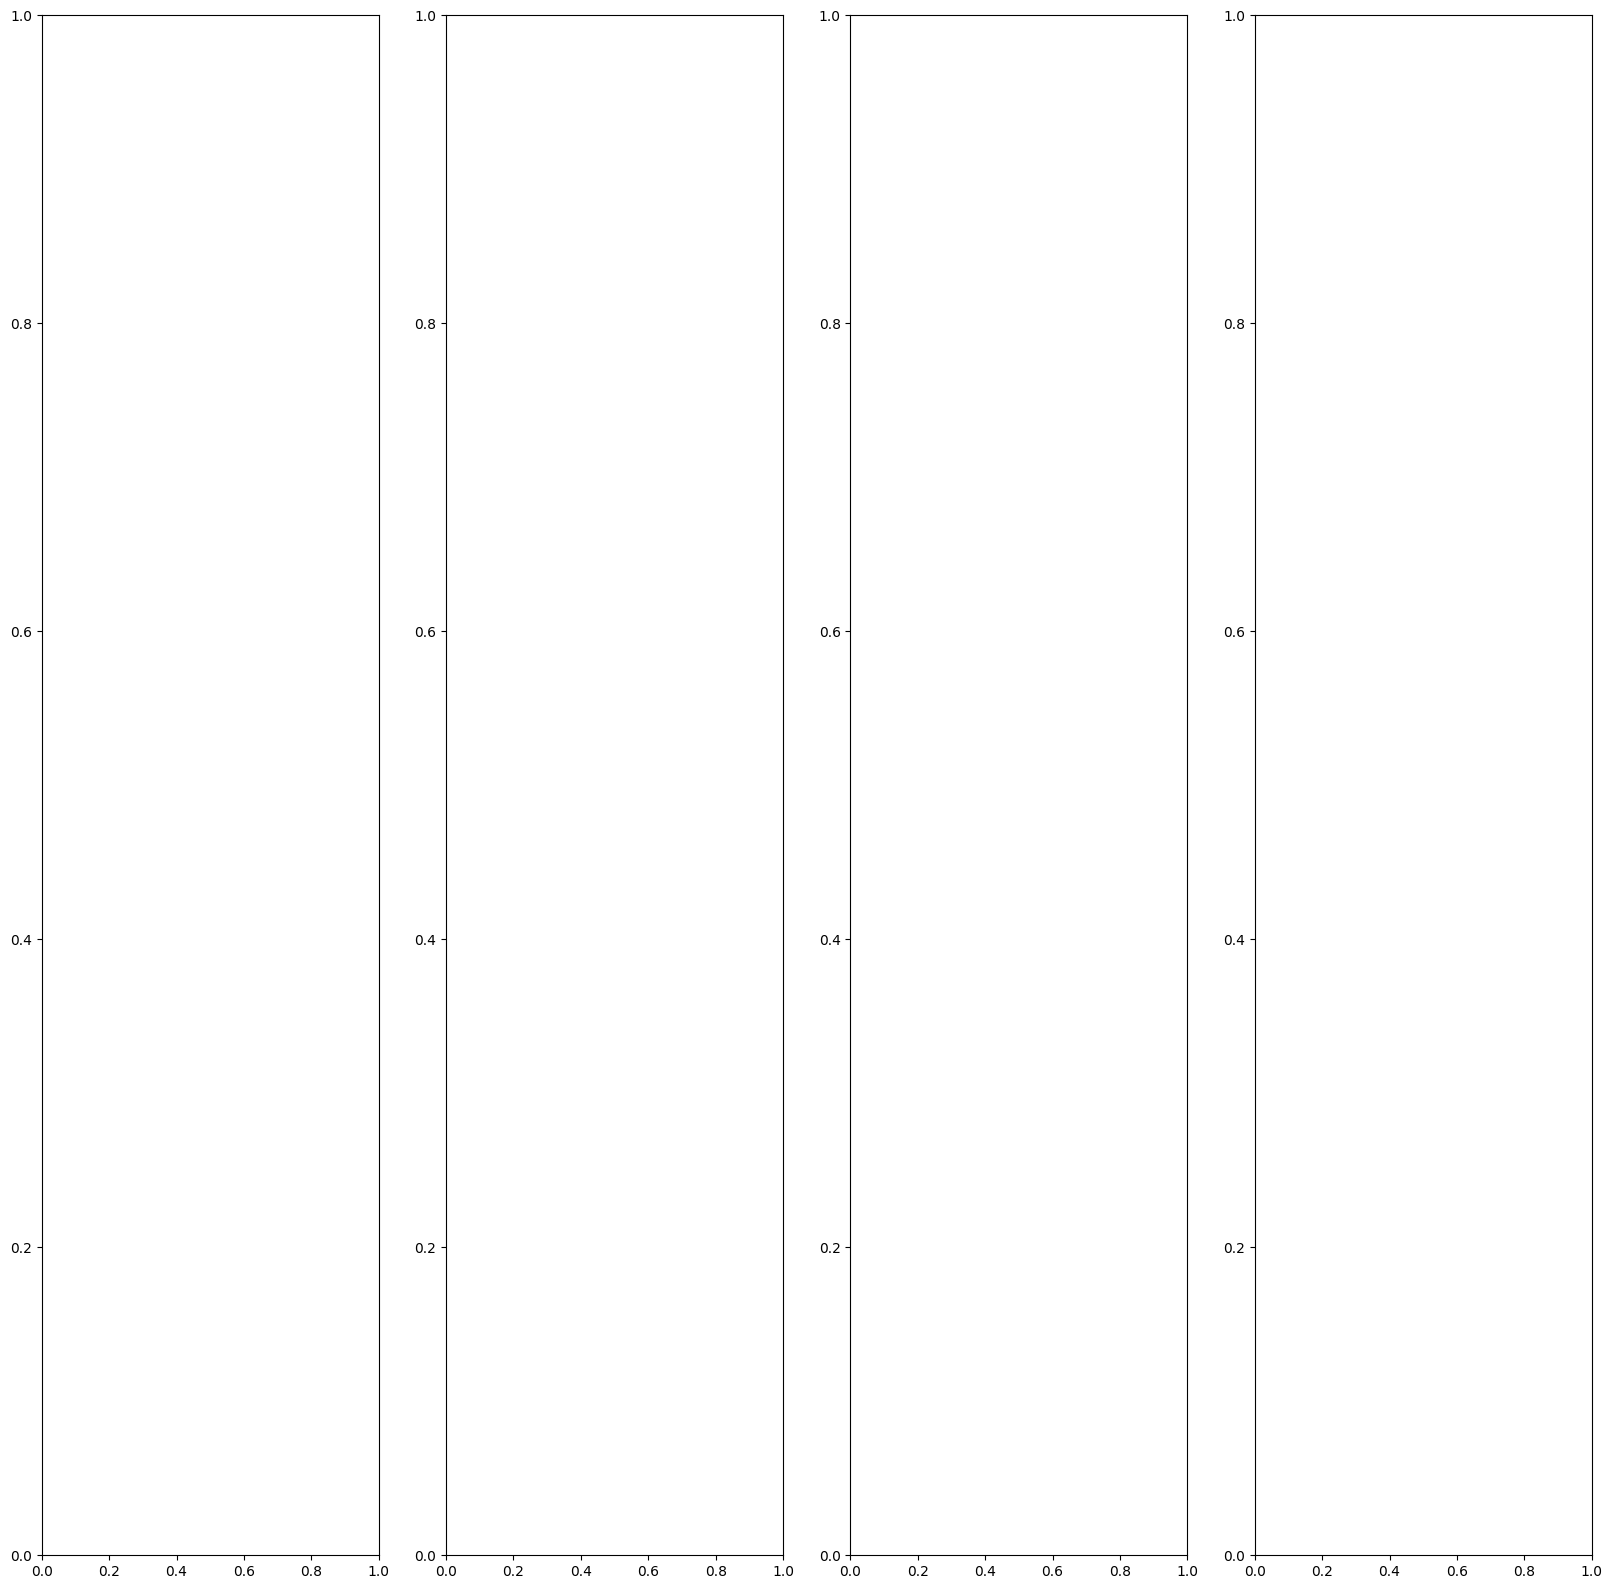

In [ ]:
#checking the value mapped for dogs and cats
#0: cats
#1: dogs
fix, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate (batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
#map the RBG values of the images to values between 0 and 1 for more efficient training (divide by 255)
data = data.map (lambda x, y: (x/255, y))

In [ ]:
scaled_iterator = data.as_numpy_iterator() #create new iterator for the new data
batch = scaled_iterator.next()

In [ ]:
#checking the mapping (max = 1 and min = 0 is ok)
batch[0].max()
batch[0].min()

In [ ]:
#spliting the data
train_size=len(data)*0.7
val_size=len(data)*0.3
train = data.take(train_size)
val=data.take(val_size)

In [ ]:
 #creating the model (binary classification)
 model = Sequential([
     Conv2D (16, (3, 3), 1, activation = 'relu', input_shape=(256, 256, 3)),
     MaxPooling2D(),
     Conv2D (32, (3, 3), 1, activation = 'relu'),
     MaxPooling2D(),
     Conv2D (16, (3, 3), 1, activation = 'relu', input_shape=(256, 256, 3)),
     MaxPooling2D(),
     Flatten(),
     Dense (256, activation = 'relu'),
     Dense (1, activation='sigmoid')
 ])

In [ ]:
#optimizer and early stopping
model.compile (
    optimizer='adam',
    loss = tf.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)
early_stopping=EarlyStopping (
    min_delta=0.001,
    patience=3,
    restore_best_weights=True
)

In [ ]:
model.summary()

NameError: ignored

In [ ]:
#fitting model
history=model.fit (
    train,
    epochs=100,
    validation_data=val,
    callbacks=[early_stopping]
)

Epoch 1/100
86/86 [==============================] - 10s 84ms/step - loss: 0.7433 - accuracy: 0.5400 - val_loss: 0.6825 - val_accuracy: 0.5752
Epoch 2/100
86/86 [==============================] - 9s 104ms/step - loss: 0.6701 - accuracy: 0.5941 - val_loss: 0.6244 - val_accuracy: 0.6816
Epoch 3/100
86/86 [==============================] - 7s 76ms/step - loss: 0.6225 - accuracy: 0.6577 - val_loss: 0.5862 - val_accuracy: 0.7188
Epoch 4/100
86/86 [==============================] - 9s 102ms/step - loss: 0.5431 - accuracy: 0.7304 - val_loss: 0.5059 - val_accuracy: 0.7703
Epoch 5/100
86/86 [==============================] - 7s 80ms/step - loss: 0.4666 - accuracy: 0.7693 - val_loss: 0.4274 - val_accuracy: 0.8285
Epoch 6/100
86/86 [==============================] - 7s 75ms/step - loss: 0.3825 - accuracy: 0.8336 - val_loss: 0.4777 - val_accuracy: 0.7618
Epoch 7/100
86/86 [==============================] - 9s 99ms/step - loss: 0.3255 - accuracy: 0.8634 - val_loss: 0.3122 - val_accuracy: 0.8682
Epo

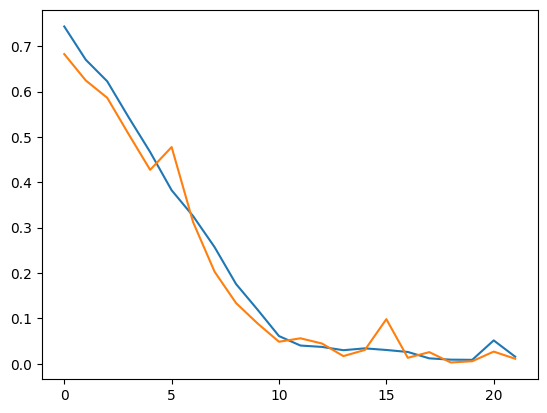

In [ ]:
#checking
plt.plot (history.history['loss'])
plt.plot (history.history['val_loss'])

In [ ]:
model.save('/content/drive/MyDrive/models/catvsdog.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#testing model
import cv2
import tensorflow as tf
img = cv2.imread('/content/test.jpg')
resized = tf.image.resize (img, (256, 256))

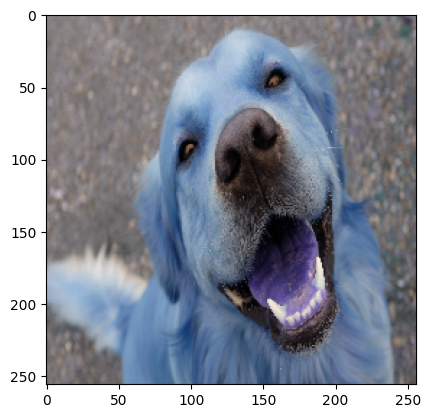

In [ ]:
plt.imshow (resized.numpy().astype(int))
plt.show()

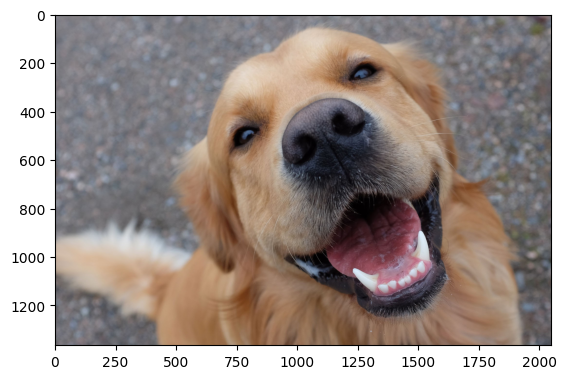

In [ ]:
#the cv2.imread function uses the BGR color coding while matplotlib uses RGB
plt.imshow (cv2.cvtColor (img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
new = load_model ('/content/catvsdog.h5')

NameError: ignored

In [ ]:
#np.expandims expand the dimension of the image array (to match the type required)
model.predict (np.expandims (resized/255, 0))